In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

%matplotlib inline

In [38]:
# Load Data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data.csv


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,5,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,6,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low


In [39]:
#Shape of the Dataset
df.shape

(1000, 25)

In [40]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [41]:
#set the ID column to be the index of the dataframe
df = df.set_index('index')

In [23]:
# df = df.drop('Patient Id', axis=1)

In [42]:
# Columns in the dataset
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [43]:
# Create the mapping dictionary
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Fill NaN values with a default value, for example 0
df['Level'] = df['Level'].map(level_mapping)

# Convert the column to an integer type
df['Level'] = df['Level'].astype('int64')

# Verify the result
print(df['Level'])


index
0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64


In [44]:
#The number of Benign and Maglinant cases from the dataset.
print(df.groupby('Level').size())

Level
1    303
2    332
3    365
dtype: int64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null   int6

In [46]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Age                     0
Gender                  0
Air Pollution           0
Alcohol use             0
Dust Allergy            0
OccuPational Hazards    0
Genetic Risk            0
chronic Lung Disease    0
Balanced Diet           0
Obesity                 0
dtype: int64

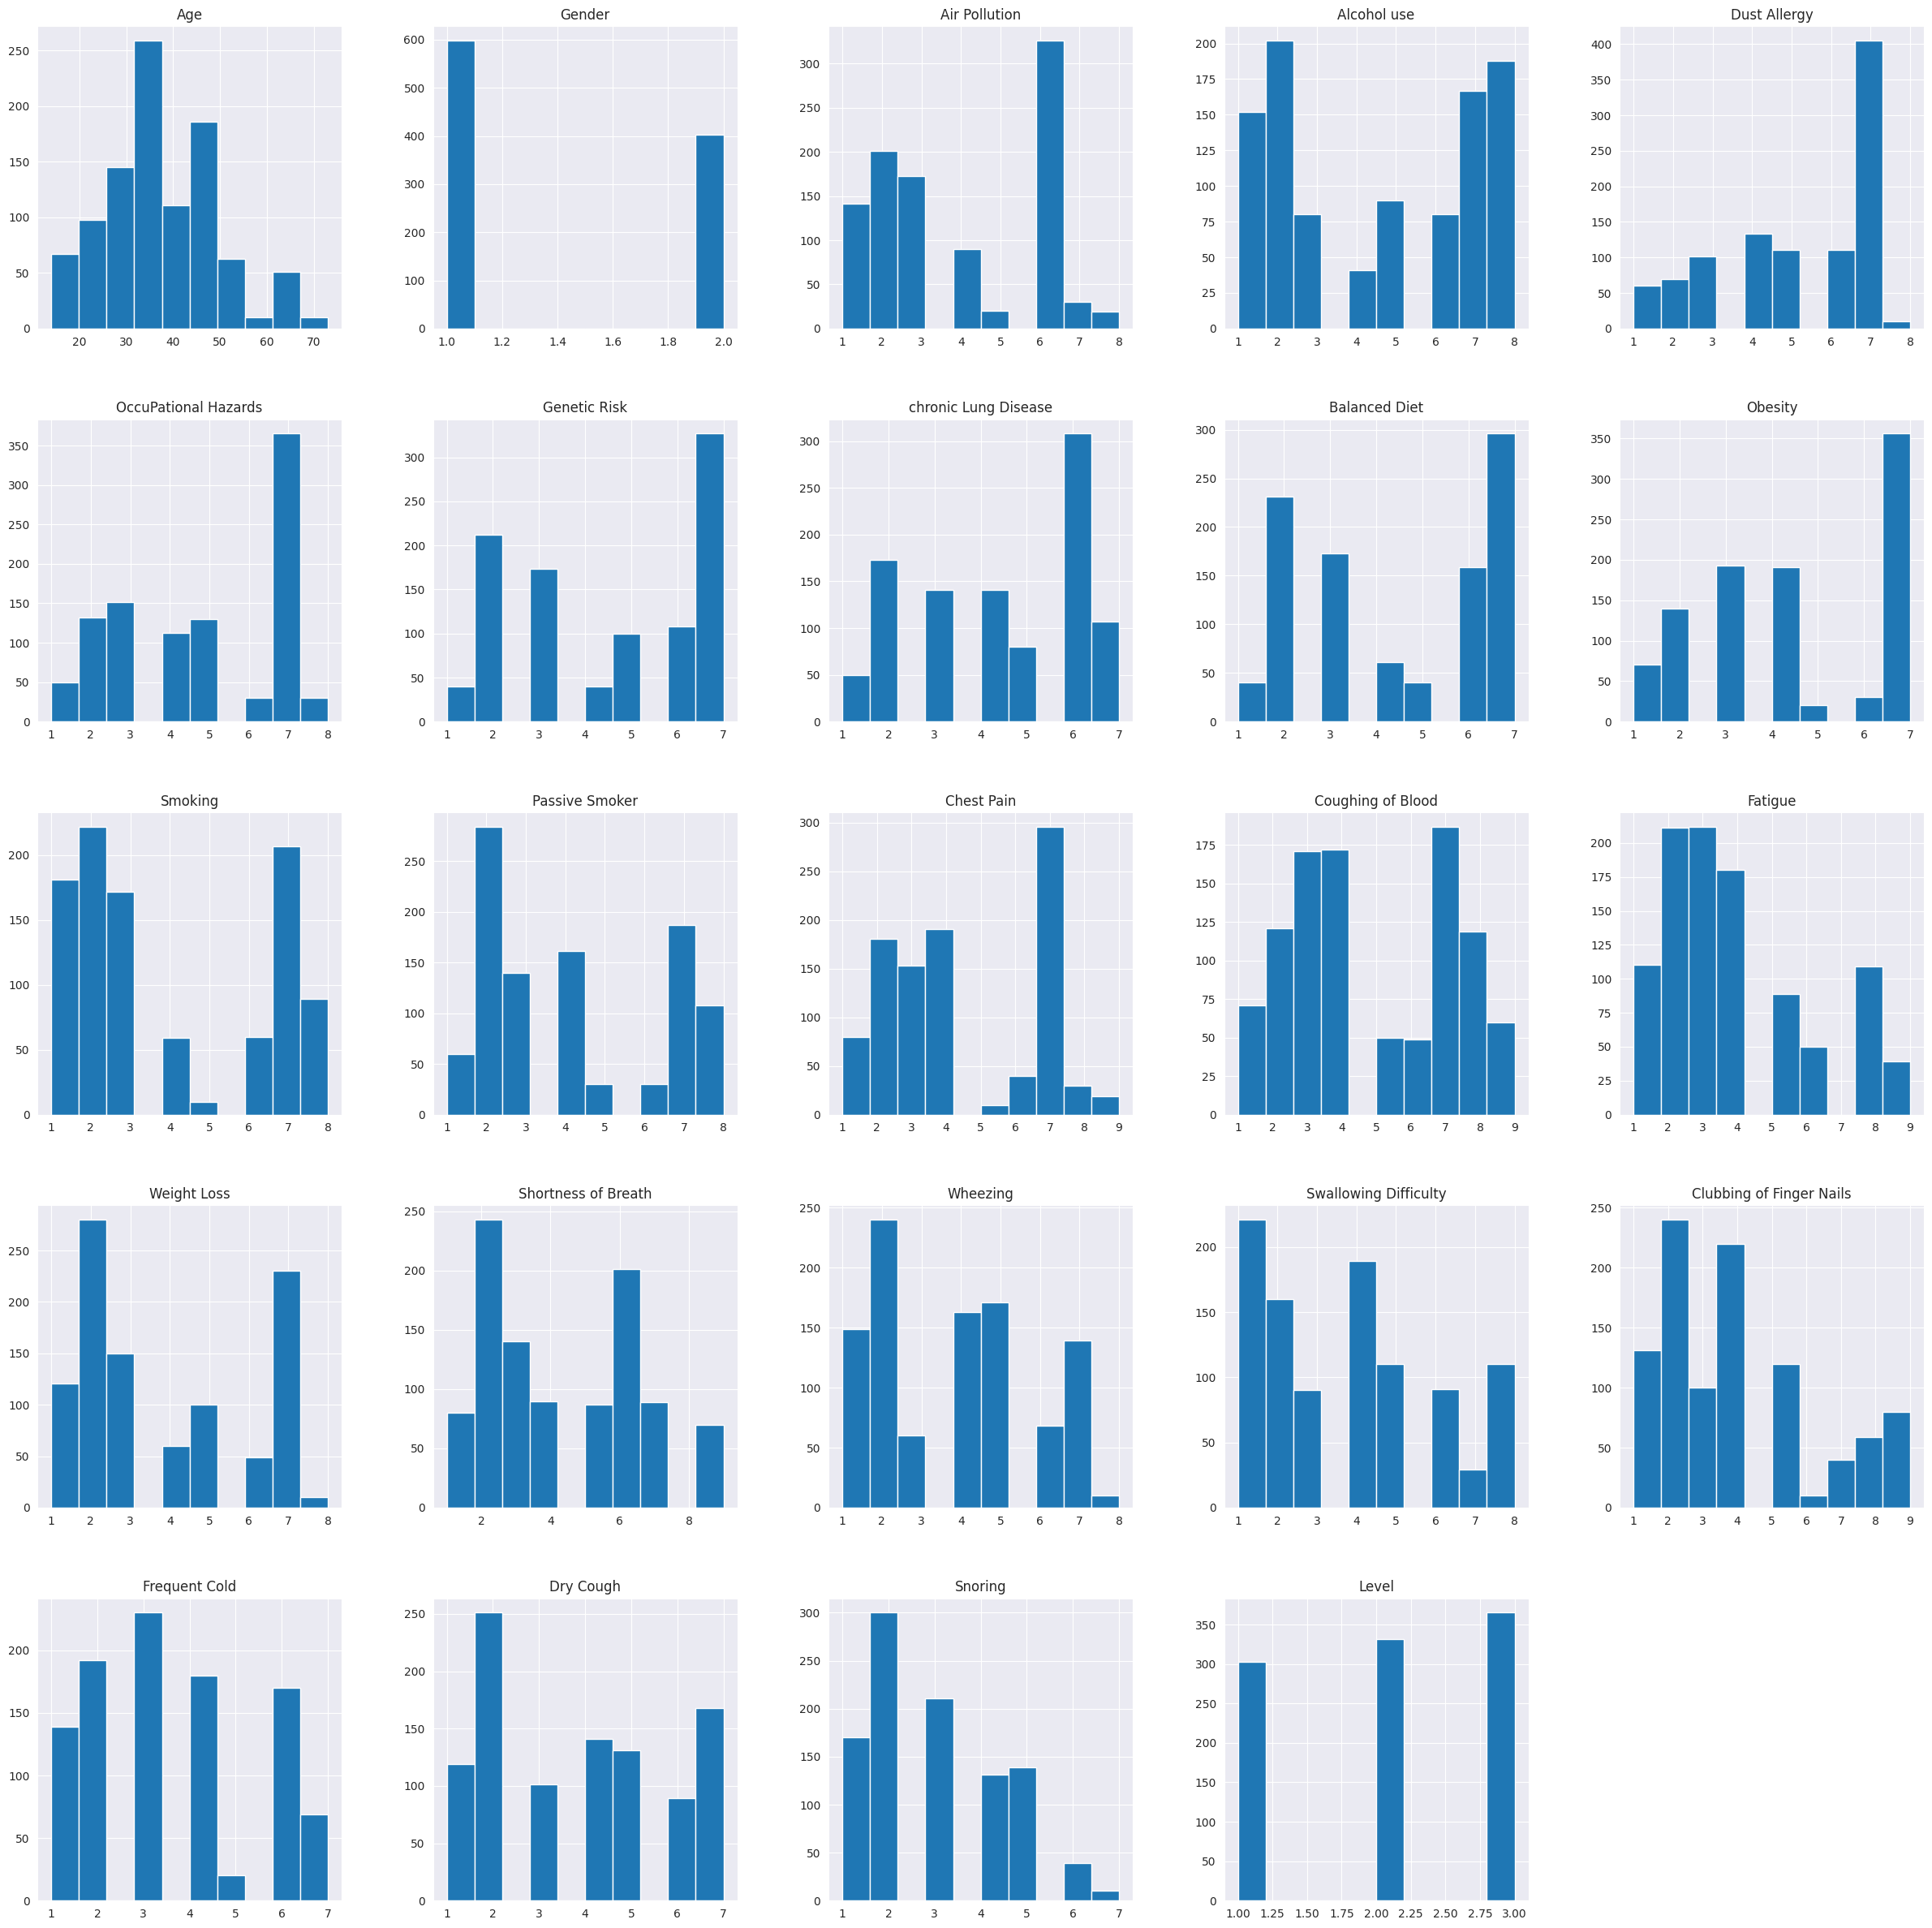

In [47]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

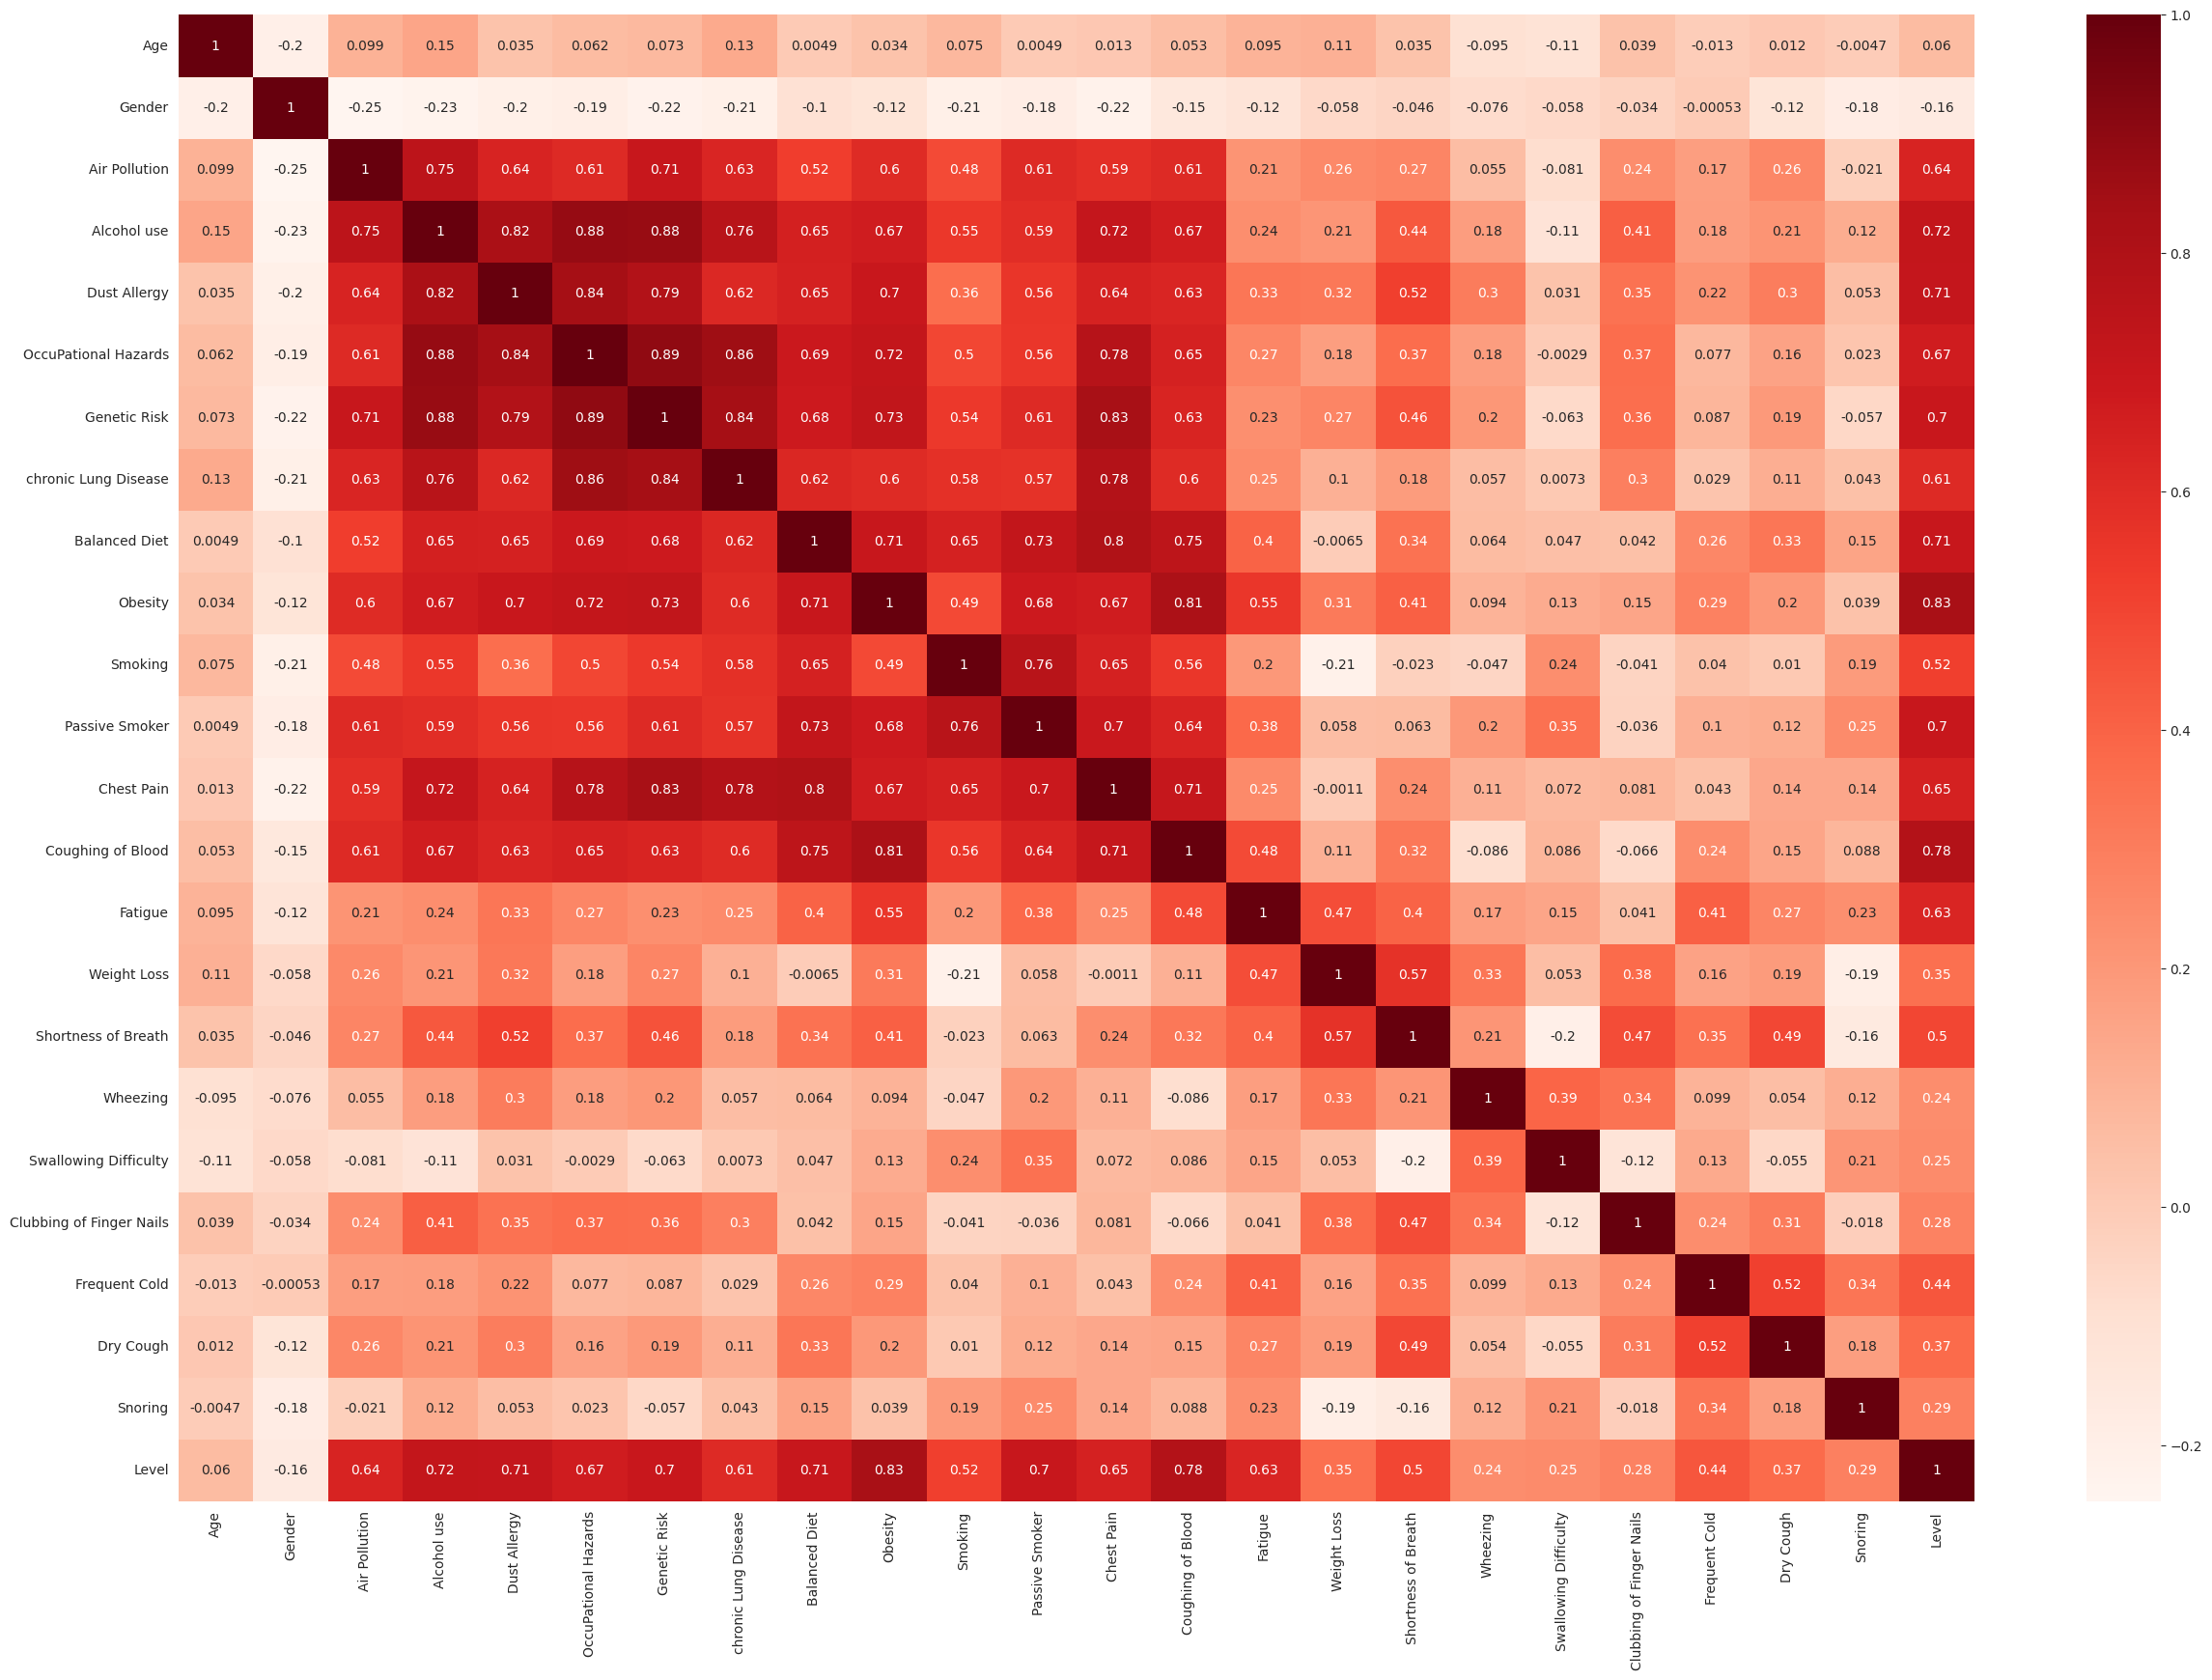

In [48]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [49]:
#Correlation with output variable
cor_target = abs(cor["Level"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

Alcohol use          0.718710
Dust Allergy         0.713839
Genetic Risk         0.701303
Balanced Diet        0.706273
Obesity              0.827435
Passive Smoker       0.703594
Coughing of Blood    0.782092
Level                1.000000
Name: Level, dtype: float64

In [50]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets.

Y = df['Level'].values
X = df.drop('Level', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [51]:
# Testing Options
scoring = 'accuracy'

In [52]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 1.000000 (Std accuracy is 0.000000)
For SVM Model:Mean accuracy is 0.971250 (Std accuracy is 0.013750)
For NB Model:Mean accuracy is 0.892500 (Std accuracy is 0.025125)
For KNN Model:Mean accuracy is 0.998750 (Std accuracy is 0.003750)


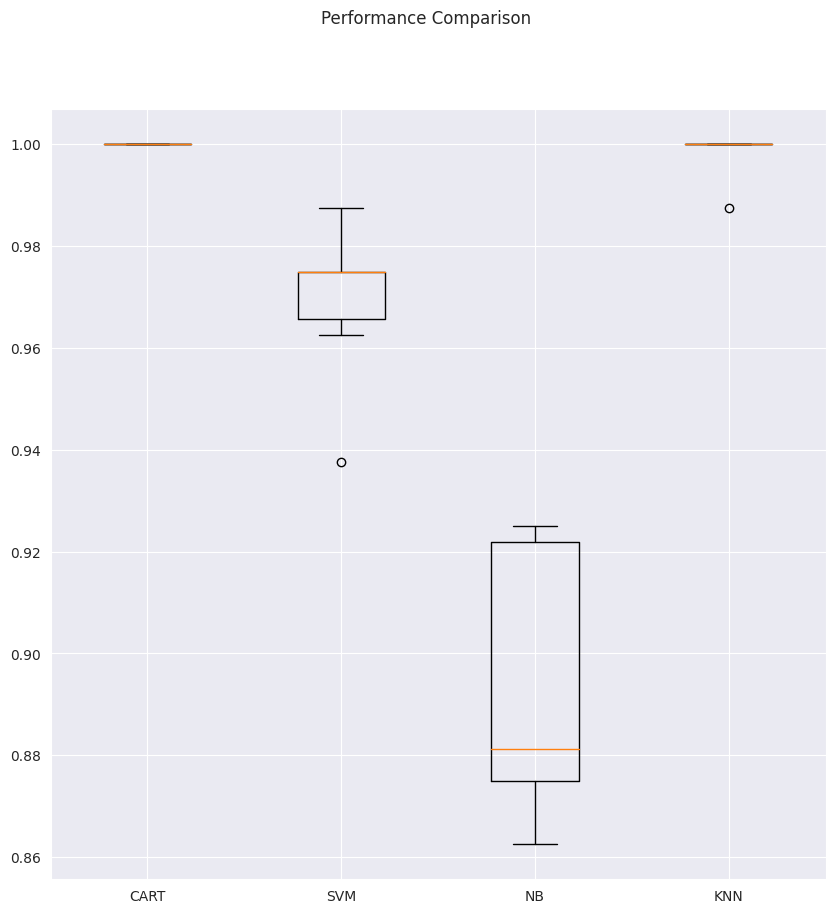

In [53]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
# Standardize the dataset
import warnings
pipelines = []

pipelines.append(('Scaled CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('Scaled NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

kfold = KFold(n_splits= 10)
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print( "For %s Model: Mean Accuracy is %f (Std Accuracy is %f)" % (name, cv_results.mean(), cv_results.std()))

For Scaled CART Model: Mean Accuracy is 1.000000 (Std Accuracy is 0.000000)
For Scaled SVM Model: Mean Accuracy is 1.000000 (Std Accuracy is 0.000000)
For Scaled NB Model: Mean Accuracy is 0.892500 (Std Accuracy is 0.025125)
For Scaled KNN Model: Mean Accuracy is 1.000000 (Std Accuracy is 0.000000)


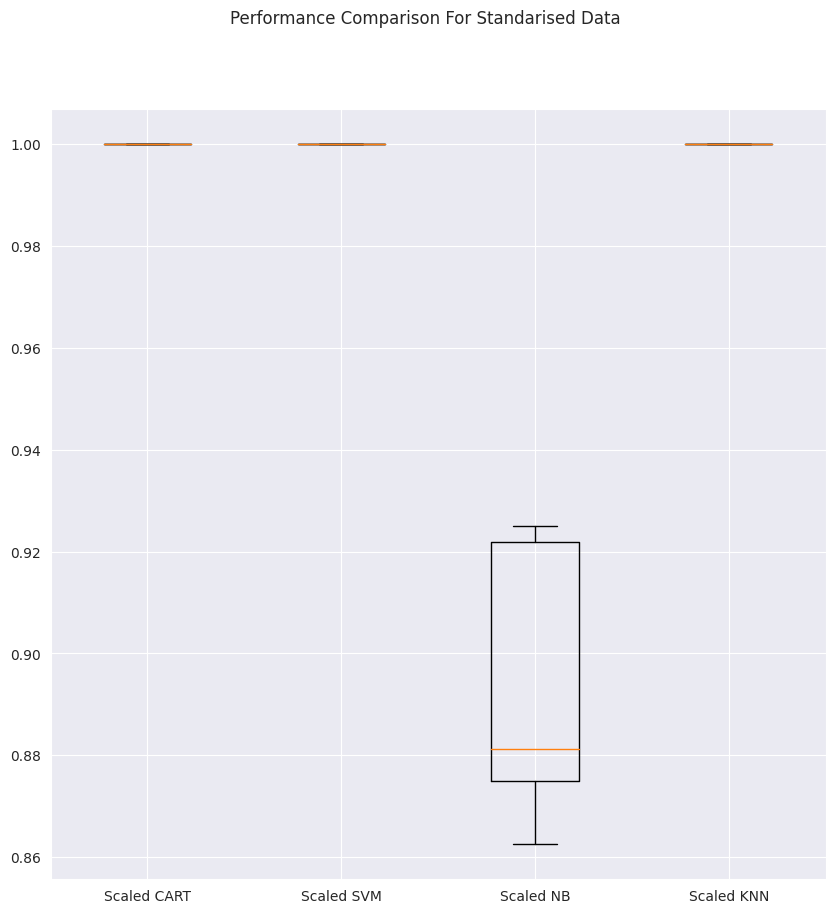

In [55]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison For Standarised Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))

# Accuracy - ratio of correctly predicted observation to the total observations.
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false


Model: CART
Accuracy score: 1.0
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Model: SVM
Accuracy score: 0.965
Classification report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        68
           2       0.93      0.97      0.95        65
           3       0.97      1.00      0.99        67

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200


Model: NB
Accuracy score: 0.88
Classification report:
               precision    recall  f1-score   support

           1

In [57]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.965


array([1, 1, 3, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 1, 1,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 2, 2,
       2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 2, 2, 3, 2,
       1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 3,
       2, 2, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 3, 3,
       2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 2,
       2, 2, 3, 1, 1, 2, 1, 2, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 3, 2, 2, 1,
       2, 1])

In [63]:
example_measures = [[35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2]]
prediction = clf.predict(example_measures)
print(prediction)

[3]


In [59]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        68
           2       0.93      0.97      0.95        65
           3       0.97      1.00      0.99        67

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200

Confusion matrix, without normalization
[[63  0]
 [ 0  0]]


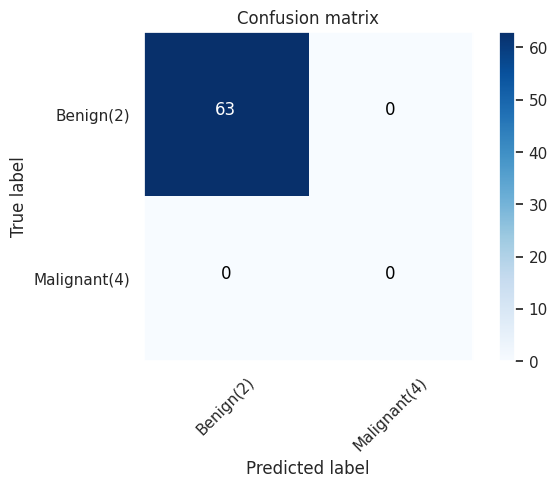

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [61]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4]]))

[1]
